# DATA PRE-PROCESSING 

### 1. Importing Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import warnings
import pickle
warnings.filterwarnings('ignore')



In [2]:
dt=pd.read_csv("AI_Human.csv")

dt

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


### 2. Feature Engg

In [3]:
dt["len"]=dt["text"].apply(len)

In [4]:
human=dt[dt['generated']==1]
ai=dt[dt['generated']==0]

dt['generated_cor'] = dt['generated'].replace({
    1: 'Human',
    0: 'AI'
})

dt

,text,generated,len,generated_cor
0,Cars. Cars have been around since they became ...,0.0,3289,AI
1,Transportation is a large necessity in most co...,0.0,2738,AI
2,"""America's love affair with it's vehicles seem...",0.0,4428,AI
3,How often do you ride in a car? Do you drive a...,0.0,4013,AI
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,AI
...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968,AI
487231,The whole purpose of democracy is to create a ...,0.0,2319,AI
487232,I firmly believe that governments worldwide sh...,1.0,2392,Human
487233,I DFN't agree with this decision because a LFT...,0.0,1668,AI


### 3. Displaying No of available text of both categories 

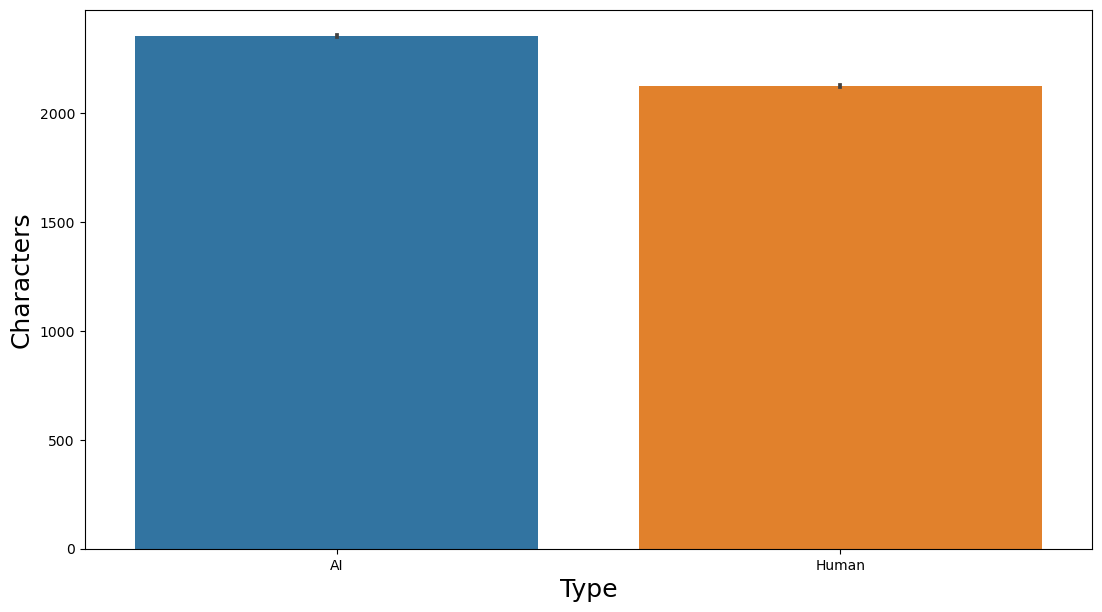

In [5]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(y='len', x='generated_cor', data=dt)

plt.xlabel('Type', fontsize=18)
plt.ylabel('Characters', fontsize=18)

plt.show()

### 4. Data cleaning 

In [6]:
dt.isnull().sum()

text             0
generated        0
len              0
generated_cor    0
dtype: int64

NO null values are present 

# Model building 

In [7]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(dt['text'],dt['generated_cor'],test_size=0.2,random_state=42)

In [9]:
X_train

110501    I think that FACS is very useful technology, t...
262291    Should students create their own summer projec...
159503    As an average 8thgrade student, I have develop...
193029    Holy Avocados! A new computer software has jus...
31127     Title: A Cowboy Who Rode the Waves\n\nOnce upo...
                                ...                        
259178    Work together to improve people's lives.\n\nTh...
365838    The advantages of limiting car usage result in...
131932     Is it a good idea for students to finish high...
146867    Offering distance learning as an option for st...
121958    As school budgets are stretched, some schools ...
Name: text, Length: 389788, dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

In [12]:
pipe_logistic=Pipeline([('step1',TfidfVectorizer()),('step2',LogisticRegression())])

pipe_logistic.fit(X_train,y_train)

Pipeline(steps=[('step1', TfidfVectorizer()), ('step2', LogisticRegression())])

In [13]:
pipe_NB = Pipeline([('step1',TfidfVectorizer()),('step2',MultinomialNB())])

pipe_NB.fit(X_train,y_train)

Pipeline(steps=[('step1', TfidfVectorizer()), ('step2', MultinomialNB())])

In [14]:
pipe_svc = Pipeline([('step1',TfidfVectorizer()),('step2',LinearSVC())])

pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('step1', TfidfVectorizer()), ('step2', LinearSVC())])

In [16]:
predict_logistic = pipe_logistic.predict(x_test) 
predict_NB = pipe_NB.predict(x_test)
predict_svc = pipe_svc.predict(x_test)

In [22]:

with open('model.pkl','wb') as f:
    pickle.dump(pipe_logistic,f)

In [23]:
print(accuracy_score(y_test,predict_logistic))
print(accuracy_score(y_test,predict_NB))
print(accuracy_score(y_test,predict_svc))

0.9947458618531099
0.949593112153273
0.9983170338748243


In [19]:
generated_sentence = ["Every morning, the sun's golden rays bring a promise of new adventures and endless possibilities."]

transformed_frase_logistic = pipe_logistic.named_steps['step1'].transform(generated_sentence)
predicted_class_logistic = pipe_logistic.named_steps['step2'].predict(transformed_frase_logistic)
print(f"Predict logistic: {predicted_class_logistic}")

transformed_frase_NB = pipe_NB.named_steps['step1'].transform(generated_sentence)
predicted_class_NB = pipe_NB.named_steps['step2'].predict(transformed_frase_NB)
print(f"Predict NB: {predicted_class_NB}")

transformed_frase_svc = pipe_svc.named_steps['step1'].transform(generated_sentence)
predicted_class_svc = pipe_svc.named_steps['step2'].predict(transformed_frase_svc)
print(f"Predict SVC: {predicted_class_svc}")

Predict logistic: ['Human']
Predict NB: ['AI']
Predict SVC: ['Human']


In [20]:
l1 = [predicted_class_logistic, predicted_class_NB, predicted_class_svc]
f_human = 0
f_ai = 0
for i in l1:
    if i ==  "Human":
        f_human +=1 
    else:
        f_ai += 1
if f_human >f_ai:
    print("Text generated by human")
else:
    print("Text generated by ai")

Text generated by human


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multioutput import ClassifierChain

# Define the classifiers
nb = MultinomialNB()
lr = LogisticRegression()
svc = SVC()

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifiers', ClassifierChain([nb, lr, svc]))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the class label for a new sentence
sentence = "Every morning, the sun's golden rays bring a promise of new adventures and endless possibilities."
predictions = pipeline.predict(sentence)

# The predictions variable will contain the class labels predicted by the final model
print("Predictions:", predictions)

KeyboardInterrupt: 